In [3]:
from trace_IO import *
from OF_trigger import *
from tools import *
import matplotlib.pyplot as plt
import numpy as np


sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
# Parameters

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)



In [9]:
n_sets = 100
energy = 100
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)


max_amplitudes = []

for i in range(n_sets):
    amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
    max_amplitudes.append(max(amps))



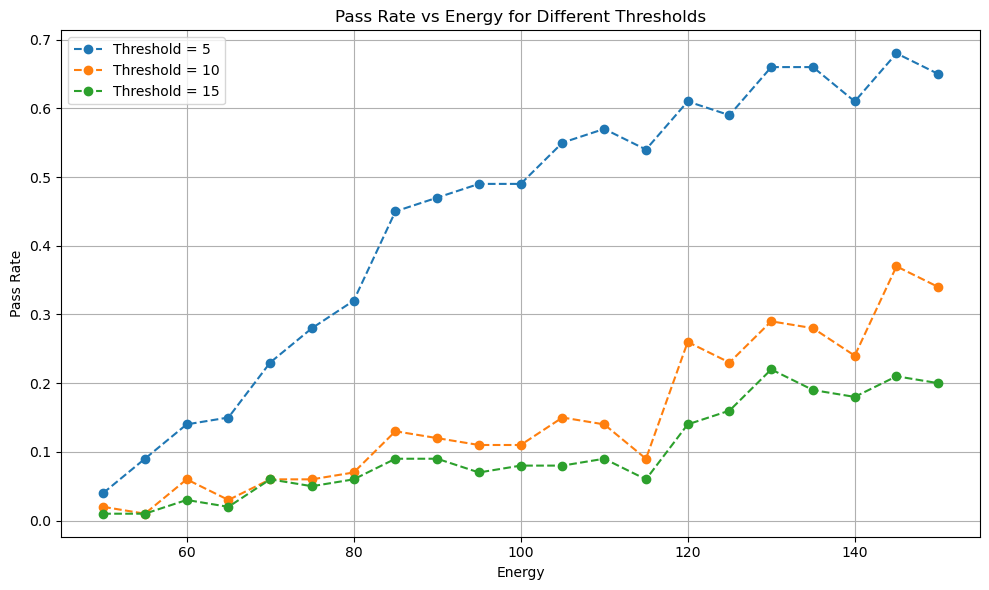

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_sets = 100
thresholds = [5, 10, 15]
energies = np.arange(50, 151, 5)
cut_pass_rates = {thr: [] for thr in thresholds}

# Main loop over energies
for energy in energies:
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)
    
    # Compute max amplitudes for each set
    max_amplitudes = []
    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(max(amps))

    # Evaluate pass rate for each threshold
    for thr in thresholds:
        passed = [amp > thr for amp in max_amplitudes]
        pass_rate = sum(passed) / n_sets
        cut_pass_rates[thr].append(pass_rate)

# Plotting
plt.figure(figsize=(10, 6))
for thr in thresholds:
    plt.plot(energies, cut_pass_rates[thr], linestyle='--', marker='o', label=f'Threshold = {thr}')

plt.xlabel('Energy')
plt.ylabel('Pass Rate')
plt.title('Pass Rate vs Energy for Different Thresholds')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 21/21 [03:41<00:00, 10.53s/it]


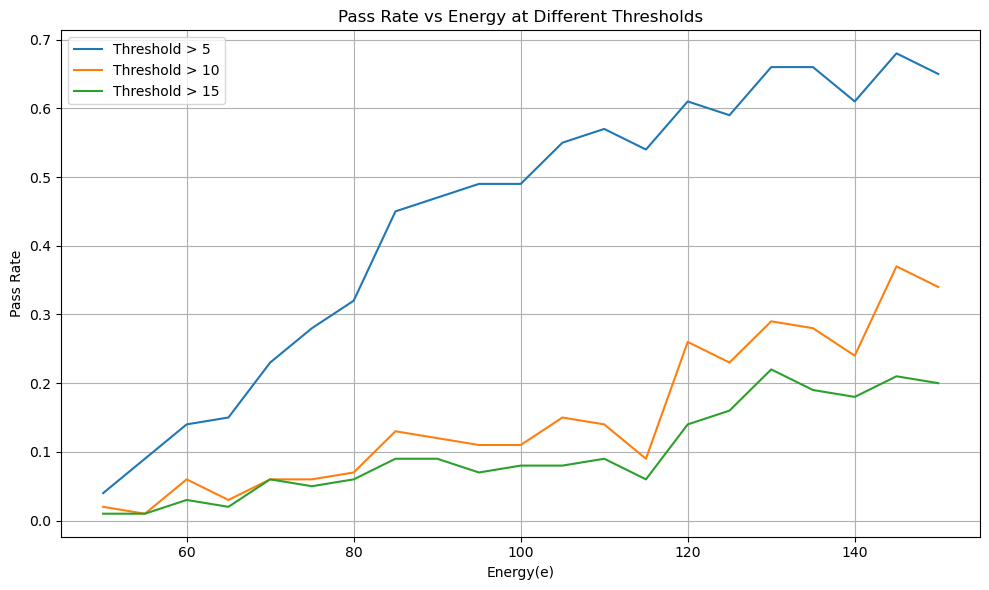

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

energy_values = list(range(50, 151, 5))
thresholds = [5, 10, 15]
pass_rates_by_threshold = {th: [] for th in thresholds}

n_sets = 100  # Adjust as needed

for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes = []

    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(np.max(amps))

    max_amplitudes = np.array(max_amplitudes)

    for th in thresholds:
        pass_rate = np.sum(max_amplitudes > th) / n_sets
        pass_rates_by_threshold[th].append(pass_rate)

# Plotting
plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(energy_values, pass_rates_by_threshold[th], label=f'Threshold > {th}')

plt.xlabel('Energy(e)')
plt.ylabel('Pass Rate')
plt.title('Pass Rate vs Energy at Different Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
for thr in thresholds:
    diffs = np.array(pass_rates_by_threshold[thr]) - np.array(cut_pass_rates[thr])
    print(f"Threshold {thr}: Mean Diff = {np.mean(diffs):.4f}, Max Diff = {np.max(diffs):.4f}")


Threshold 5: Mean Diff = 0.0000, Max Diff = 0.0000
Threshold 10: Mean Diff = 0.0000, Max Diff = 0.0000
Threshold 15: Mean Diff = 0.0000, Max Diff = 0.0000


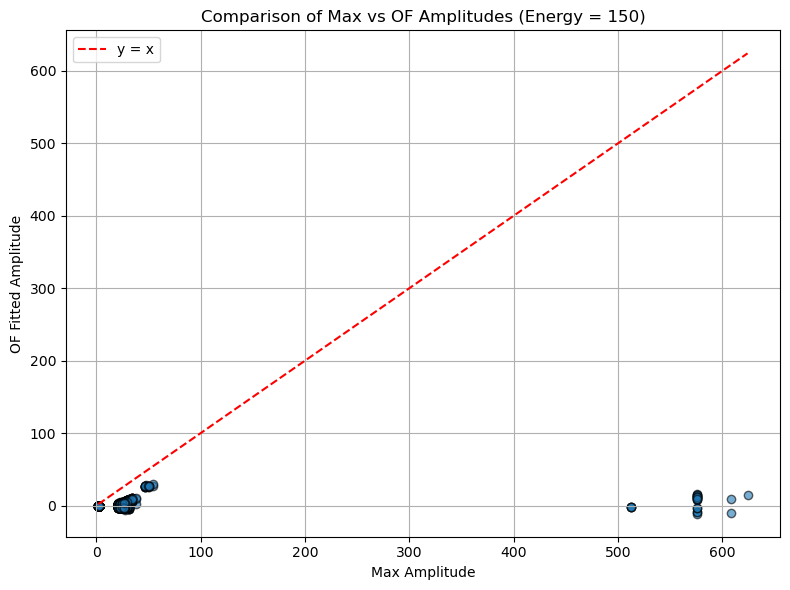

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# For a given energy level
energy = 150
n_traces = 100
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_traces)

max_amps = []
of_amps = []

# Collect max and OF-fitted amplitudes for all traces
for i in range(n_traces):
    for trace in loaded_traces[i]:
        max_amps.append(np.max(trace))
        of_amps.append(trigger.fit_with_shift(trace)[0])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(max_amps, of_amps, alpha=0.6, edgecolors='k')
plt.plot([min(max_amps), max(max_amps)], [min(max_amps), max(max_amps)], 'r--', label='y = x')

plt.xlabel('Max Amplitude')
plt.ylabel('OF Fitted Amplitude')
plt.title(f'Comparison of Max vs OF Amplitudes (Energy = {energy})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 21/21 [05:38<00:00, 16.11s/it]


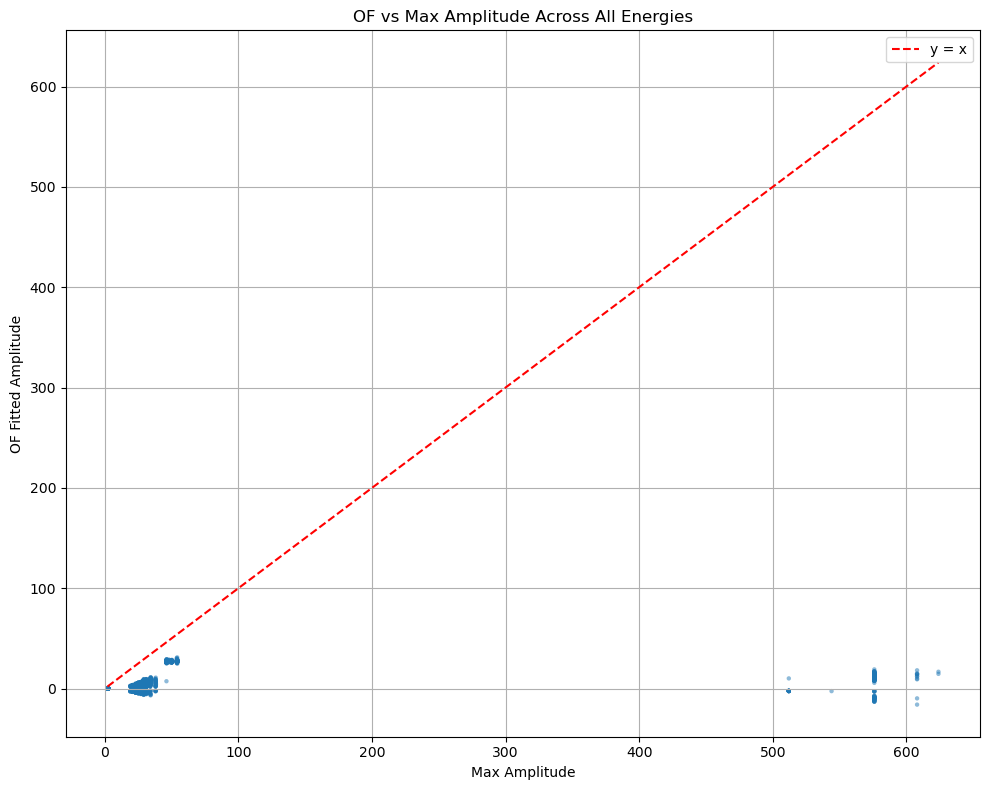

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
energies = np.arange(50, 151, 5)
n_traces = 100

max_amps = []
of_amps = []

# Process all energies
for energy in tqdm(energies, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_traces)

    for i in range(n_traces):
        for trace in loaded_traces[i]:
            max_amp = np.max(trace)
            of_amp = trigger.fit_with_shift(trace)[0]
            max_amps.append(max_amp)
            of_amps.append(of_amp)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(max_amps, of_amps, s=10, alpha=0.5, edgecolors='none')  # smaller points, semi-transparent
plt.plot([min(max_amps), max(max_amps)], [min(max_amps), max(max_amps)], 'r--', label='y = x')

plt.xlabel('Max Amplitude')
plt.ylabel('OF Fitted Amplitude')
plt.title('OF vs Max Amplitude Across All Energies')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Processing energies: 100%|██████████| 21/21 [04:10<00:00, 11.91s/it]


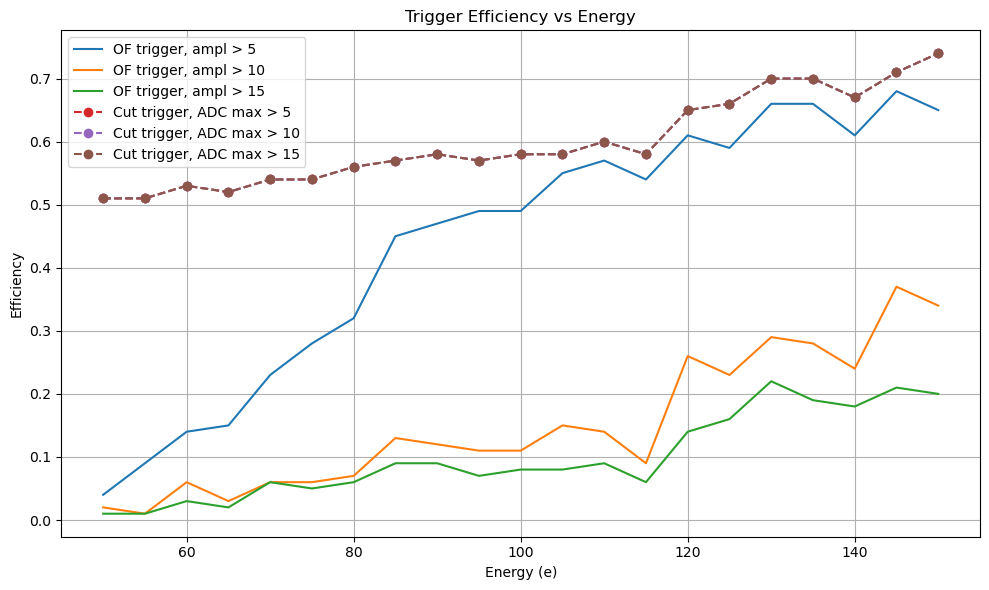

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n_sets = 100
thresholds = [5, 10, 15]  # Ensure this order is preserved throughout
energies = np.arange(50, 151, 5)

cut_pass_rates = {thr: [] for thr in thresholds}
of_pass_rates = {thr: [] for thr in thresholds}

# Store passed event amplitudes for later analysis
cut_passed_amplitudes = {thr: {'max': [], 'of': []} for thr in thresholds}
of_passed_amplitudes = {thr: {'max': [], 'of': []} for thr in thresholds}

# Process all energies
for energy in tqdm(energies, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    # Collect max amplitudes and OF amplitudes
    max_amplitudes_all = []
    of_amplitudes_all = []

    for i in range(n_sets):
        trace_max_vals = []
        trace_of_vals = []
        for trace in loaded_traces[i]:
            max_val = np.max(trace)
            of_val = trigger.fit_with_shift(trace)[0]
            trace_max_vals.append(max_val)
            trace_of_vals.append(of_val)

        # Use max of each trace group
        max_amplitudes_all.append(max(trace_max_vals))
        of_amplitudes_all.append(max(trace_of_vals))

    max_amplitudes_all = np.array(max_amplitudes_all)
    of_amplitudes_all = np.array(of_amplitudes_all)

    for thr in thresholds:
        # OF trigger
        of_pass_mask = of_amplitudes_all > thr
        of_pass_rate = np.sum(of_pass_mask) / len(of_amplitudes_all)
        of_pass_rates[thr].append(of_pass_rate)
        of_passed_amplitudes[thr]['max'].extend(max_amplitudes_all[of_pass_mask])
        of_passed_amplitudes[thr]['of'].extend(of_amplitudes_all[of_pass_mask])

        # Cut trigger
        cut_pass_mask = max_amplitudes_all > thr
        cut_pass_rate = np.sum(cut_pass_mask) / len(max_amplitudes_all)
        cut_pass_rates[thr].append(cut_pass_rate)
        cut_passed_amplitudes[thr]['max'].extend(max_amplitudes_all[cut_pass_mask])
        cut_passed_amplitudes[thr]['of'].extend(of_amplitudes_all[cut_pass_mask])

# Plotting combined efficiency
plt.figure(figsize=(10, 6))
for thr in thresholds:
    plt.plot(energies, of_pass_rates[thr], label=f'OF trigger, ampl > {thr}')
for thr in thresholds:
    plt.plot(energies, cut_pass_rates[thr], linestyle='--', marker='o', label=f'Cut trigger, ADC max > {thr}')

plt.xlabel('Energy (e)')
plt.ylabel('Efficiency')
plt.title('Trigger Efficiency vs Energy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Processing energies:   5%|▍         | 1/21 [00:05<01:48,  5.43s/it]

1.0
0.9842592592592593
0.5001851851851852


Processing energies:  10%|▉         | 2/21 [00:09<01:28,  4.63s/it]

1.0
0.9853703703703703
0.5001851851851852


Processing energies:  14%|█▍        | 3/21 [00:13<01:14,  4.15s/it]

1.0
0.9851851851851852
0.5005555555555555


Processing energies:  19%|█▉        | 4/21 [00:16<01:06,  3.93s/it]

1.0
0.9859259259259259
0.5003703703703704


Processing energies:  24%|██▍       | 5/21 [00:20<01:00,  3.80s/it]

1.0
0.9888888888888889
0.5007407407407407


Processing energies:  29%|██▊       | 6/21 [00:23<00:55,  3.67s/it]

1.0
0.9868518518518519
0.5007407407407407


Processing energies:  33%|███▎      | 7/21 [00:27<00:50,  3.64s/it]

1.0
0.9872222222222222
0.5011111111111111


Processing energies:  38%|███▊      | 8/21 [00:31<00:48,  3.72s/it]

1.0
0.9853703703703703
0.5014814814814815


Processing energies:  43%|████▎     | 9/21 [00:34<00:45,  3.75s/it]

1.0
0.9875925925925926
0.5014814814814815


Processing energies:  48%|████▊     | 10/21 [00:39<00:43,  3.96s/it]

1.0
0.9875925925925926
0.5012962962962964


Processing energies:  52%|█████▏    | 11/21 [00:44<00:41,  4.20s/it]

1.0
0.9844444444444445
0.5014814814814815


Processing energies:  57%|█████▋    | 12/21 [00:48<00:36,  4.11s/it]

1.0
0.9875925925925926
0.5016666666666667


Processing energies:  62%|██████▏   | 13/21 [00:51<00:31,  3.98s/it]

1.0
0.9892592592592593
0.5018518518518519


Processing energies:  67%|██████▋   | 14/21 [00:55<00:27,  3.94s/it]

1.0
0.9862962962962963
0.5014814814814815


Processing energies:  71%|███████▏  | 15/21 [00:59<00:23,  3.94s/it]

1.0
0.9846296296296296
0.5033333333333333


Processing energies:  76%|███████▌  | 16/21 [01:03<00:19,  3.89s/it]

1.0
0.9868518518518519
0.5031481481481481


Processing energies:  81%|████████  | 17/21 [01:07<00:15,  3.90s/it]

1.0
0.9879629629629629
0.5038888888888889


Processing energies:  86%|████████▌ | 18/21 [01:11<00:11,  3.87s/it]

1.0
0.9888888888888889
0.5038888888888889


Processing energies:  90%|█████████ | 19/21 [01:14<00:07,  3.77s/it]

1.0
0.985
0.5035185185185185


Processing energies:  95%|█████████▌| 20/21 [01:18<00:03,  3.69s/it]

1.0
0.9877777777777778
0.5046296296296297


Processing energies: 100%|██████████| 21/21 [01:21<00:00,  3.89s/it]

1.0
0.9874074074074074
0.5048148148148148


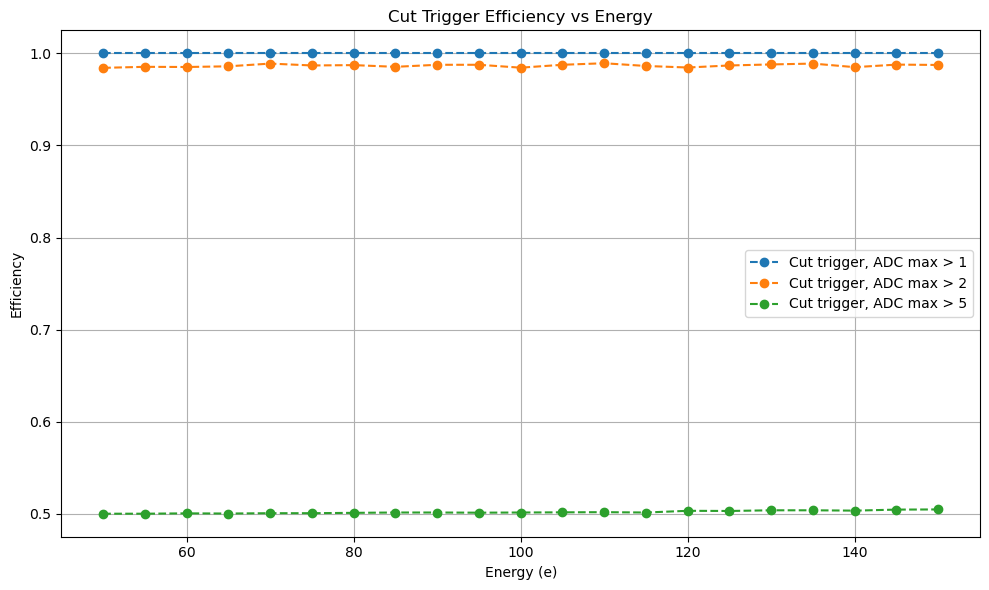

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n_sets = 100
thresholds = [1, 2, 5]  # Ensure this order is preserved throughout
energies = np.arange(50, 151, 5)

cut_pass_rates = {thr: [] for thr in thresholds}
cut_passed_amplitudes = {thr: {'max': []} for thr in thresholds}

# Process all energies
for energy in tqdm(energies, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes_all = []

    for i in range(n_sets):
        for trace in loaded_traces[i]:
            max_val = np.max(trace)
            max_amplitudes_all.append(max_val)

    max_amplitudes_all = np.array(max_amplitudes_all)
    total_traces = len(max_amplitudes_all)

    for thr in thresholds:
        cut_pass_mask = max_amplitudes_all > thr
        cut_pass_rate = np.sum(cut_pass_mask) / total_traces
        print(cut_pass_rate)
        cut_pass_rates[thr].append(cut_pass_rate)
        cut_passed_amplitudes[thr]['max'].extend(max_amplitudes_all[cut_pass_mask])

# Plotting cut trigger efficiency
plt.figure(figsize=(10, 6))
for thr in thresholds:
    plt.plot(energies, cut_pass_rates[thr], linestyle='--', marker='o', label=f'Cut trigger, ADC max > {thr}')

plt.xlabel('Energy (e)')
plt.ylabel('Efficiency')
plt.title('Cut Trigger Efficiency vs Energy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
loaded_traces[0].shape

(54, 32768)

In [59]:
max_val = np.max(loaded_traces[0][5])

In [60]:
max_val

2.25